Index:190098M

Question 01

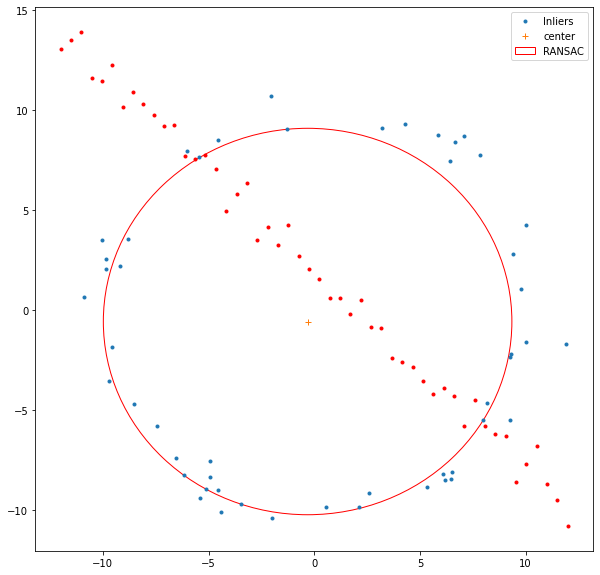

In [14]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np . random.seed ( 0 )
fig, ax = plt.subplots(figsize=(10,10))
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform (0 , 2*np.pi,half_n )
n = s*np . random.randn ( half_n )
x , y = ( r + n)*np.cos ( t ) , ( r + n)*np.sin ( t )
X_circ = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )

iterations = 100
inlier_ratio = 0.95
threshold_dist = 1
threshold_inlier_counts =40
def calc_center(x1,x2,x3,y1,y2,y3):
    a = (x1-x2)**2 + (y1-y2)**2
    b = (x2-x3)**2 + (y2-y3)**2
    c = (x3-x1)**2 + (y3-y1)**2
    p = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    X = (b*(c+a-b)*x1 + c*(a+b-c)*x2 + a*(b+c-a)*x3) / p
    Y = (b*(c+a-b)*y1 + c*(a+b-c)*y2 + a*(b+c-a)*y3) / p 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    radius = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5

    return ((X,Y),radius)   

for i in range(0,iterations,1):
    rand1,rand2,rand3 = np.random.randint(50),np.random.randint(50),np.random.randint(50)
    point1,point2,point3 = X_circ[rand1],X_circ[rand2],X_circ[rand3]
    x1,y1,x2,y2,x3,y3 = point1[0],point1[1],point2[0],point2[1],point3[0],point3[1]
    center,radius = calc_center(x1,x2,x3,y1,y2,y3)
    inliers = 0
    for j in range(0,half_n):
        d=((X_circ[j][0]-center[0])**2 +(X_circ[j][1]-center[1])**2)**0.5
        
        if(abs(d-radius)<=threshold_dist):
            inliers+=1

    if(threshold_inlier_counts<=inliers):
        ax.plot(x,y,".",label="Inliers")
        ax.plot(center[0],center[1],'+',label='center')
        draw_circle = plt.Circle((center[0],center[1]), radius,fill=False,color='r',label='RANSAC')
        ax.add_artist(draw_circle)
        plt.legend()
        break
m,b = -1,2
s=r/16
x_line = np.linspace(-12,12,half_n)
y_line = m*x_line+b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1), y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))
plt.plot(x_line,y_line,".",color='r')
plt.show()


Question 02

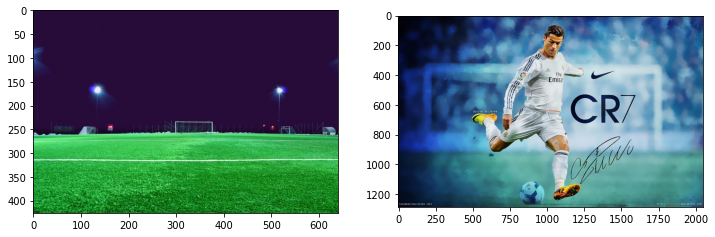

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
bigImg = cv.imread(r'ground.jpg',cv.IMREAD_COLOR)
smallImg = cv.imread(r'ronaldo.jpg',cv.IMREAD_COLOR)
assert smallImg is not None
assert bigImg is not None
bigImg_cvt = cv.cvtColor(bigImg,cv.COLOR_BGR2RGB)
smallImg_cvt = cv.cvtColor(smallImg,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(bigImg_cvt)
ax[1].imshow(smallImg_cvt)
plt.show()

In [8]:
# fuction use to identify points using mouse clicks
import cv2 as cv

def click_event(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ' ', y)
        cv.imshow('image', img)

img = cv.imread(r'ground.jpg', 1)
cv.imshow('image', img)
cv.setMouseCallback('image', click_event)
cv.waitKey(0)
cv.destroyAllWindows()

140   276
488   271
500   420
118   419


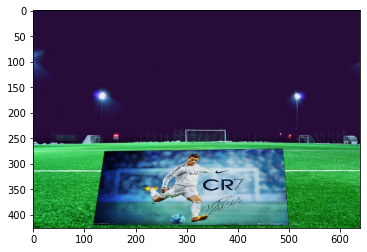

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

background = cv.imread(r'ground.jpg')
foreground = cv.imread(r'ronaldo.jpg')
assert background is not None
assert foreground is not None
selectedPoints = np.array([[140,276],  [488,271], [500,420],[118,419]])
foregroundPoints = np.array([[0, 0], [foreground.shape[1] - 1, 0], [foreground.shape[1] - 1, foreground.shape[0] - 1], [0, foreground.shape[0] - 1]])
homographyMatrix, status = cv.findHomography(foregroundPoints, selectedPoints)
result1 = cv.warpPerspective(foreground, homographyMatrix, (background.shape[1], background.shape[0]))
cv.fillConvexPoly(background, selectedPoints, 0, 16)
result = background + result1
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.imshow(result)
plt.show()

Question 03

a)

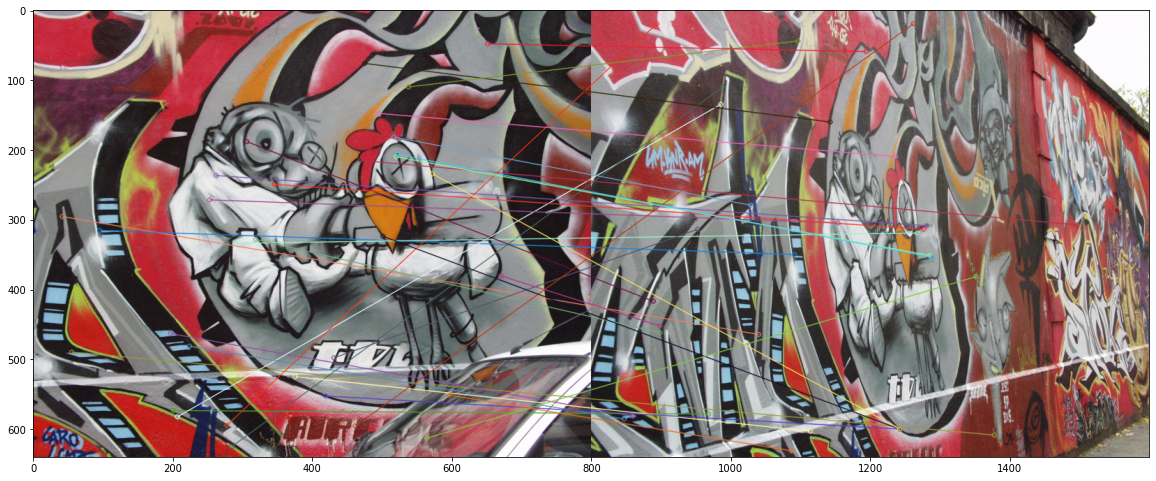

(<matplotlib.image.AxesImage at 0x1f8563610c0>, None)

In [34]:
import cv2 as cv
import matplotlib.pyplot as plt


# read images
img1 = cv.imread('graffity/img1.ppm')  
img4 = cv.imread('graffity/img4.ppm')
img5 = cv.imread('graffity/img5.ppm')
assert img1 is not None
assert img4 is not None
assert img5 is not None
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

#sift
sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_4, descriptors_4 = sift.detectAndCompute(img4,None)
keypoints_5, descriptors_5 = sift.detectAndCompute(img5,None)
#feature matching
bf = cv.BFMatcher()

matches1_5, matches1_4, matches4_5 = bf.knnMatch(descriptors_1,descriptors_5,k=2), bf.knnMatch(descriptors_1,descriptors_4,k=2), bf.knnMatch(descriptors_4,descriptors_5,k=2)
good1_4, good1_5, good4_5 = [], [], []

for m,n in matches1_4:
    if m.distance < 0.7*n.distance: good1_4.append([m])
for m,n in matches1_5:
    if m.distance < 0.7*n.distance: good1_5.append([m])
for m,n in matches4_5:
    if m.distance < 0.7*n.distance: good4_5.append([m])
final_img = cv.drawMatchesKnn(img1,keypoints_1,img5,keypoints_5,good1_5,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)



plt.figure(figsize=(20,10))
plt.imshow(final_img),plt.show()

b)

In [49]:
import cv2
import numpy as np

MIN_MATCH_COUNT = 10



orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp4, des4 = orb.detectAndCompute(img4, None)
kp5, des5 = orb.detectAndCompute(img5, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

des1 = np.float32(des1)
des2 = np.float32(des2)

matches1_5, matches1_4, matches4_5 = bf.knnMatch(descriptors_1,descriptors_5,k=2), bf.knnMatch(descriptors_1,descriptors_4,k=2), bf.knnMatch(descriptors_4,descriptors_5,k=2)
good1_4, good1_5, good4_5 = [], [], []

for m,n in matches1_4:
    if m.distance < 0.7*n.distance: good1_4.append([m])
for m,n in matches1_5:
    if m.distance < 0.7*n.distance: good1_5.append([m])
for m,n in matches4_5:
    if m.distance < 0.7*n.distance: good4_5.append([m])

src_pts = 0
dst_pts = 0

dst_pts1_5 = np.float32([keypoints_1[m[0].queryIdx].pt for m in good1_5]).reshape(-1, 2)
src_pts1_5 = np.float32([keypoints_5[m[0].trainIdx].pt for m in good1_5]).reshape(-1, 2)
dst_pts1_4 = np.float32([keypoints_1[m[0].queryIdx].pt for m in good1_4]).reshape(-1, 2)
src_pts1_4 = np.float32([keypoints_4[m[0].trainIdx].pt for m in good1_4]).reshape(-1, 2)
dst_pts4_5 = np.float32([keypoints_4[m[0].queryIdx].pt for m in good4_5]).reshape(-1, 2)
src_pts4_5 = np.float32([keypoints_5[m[0].trainIdx].pt for m in good4_5]).reshape(-1, 2)


def generateRandom(src_Pts, dest_Pts, N):
    r = np.random.choice(len(src_Pts), N)
    src = [src_Pts[i] for i in r]
    dest = [dest_Pts[i] for i in r]
    return np.asarray(src, dtype=np.float32), np.asarray(dest, dtype=np.float32)


def findH(src, dest, N):
    A = []
    for i in range(N):
        x, y = src[i][0], src[i][1]
        xp, yp = dest[i][0], dest[i][1]
        A.append([x, y, 1, 0, 0, 0, -x * xp, -xp * y, -xp])
        A.append([0, 0, 0, x, y, 1, -yp * x, -yp * y, -yp])
    A = np.asarray(A)
    U, S, Vh = np.linalg.svd(A)
    L = Vh[-1, :] / Vh[-1, -1]
    H = L.reshape(3, 3)
    return H


def ransacHomography(src_Pts, dst_Pts):
    maxI = 0
    maxLSrc = []
    maxLDest = []
    for i in range(70):
        srcP, destP = generateRandom(src_Pts, dst_Pts, 4)
        H = findH(srcP, destP, 4)
        inlines = 0
        linesSrc = []
        lineDest = []
        for p1, p2 in zip(src_Pts, dst_Pts):
            p1U = (np.append(p1, 1)).reshape(3, 1)
            p2e = H.dot(p1U)
            p2e = (p2e / p2e[2])[:2].reshape(1, 2)[0]
            if cv2.norm(p2 - p2e) < 10:
                inlines += 1
                linesSrc.append(p1)
                lineDest.append(p2)
        if inlines > maxI:
            maxI = inlines
            maxLSrc = linesSrc.copy()
            maxLSrc = np.asarray(maxLSrc, dtype=np.float32)
            maxLDest = lineDest.copy()
            maxLDest = np.asarray(maxLDest, dtype=np.float32)
    Hf = findH(maxLSrc, maxLDest, maxI)
    return Hf



H1_4 = ransacHomography(src_pts1_4, dst_pts1_4) # calculate H matrix for image 1 and 4
H4_5 = ransacHomography(src_pts4_5, dst_pts4_5) # calculate H matrix for image 4 and 5
H1_5=np.matmul(H1_4,H4_5) # calculate H matrix for image 1 and 5
H1_5



array([[ 2.09577458e+00, -1.41442706e-01, -4.63690524e+02],
       [-4.07773084e-01,  9.27354595e-01,  1.11776656e+02],
       [-1.02301518e-03,  1.02908109e-04,  1.27302797e+00]])

c)

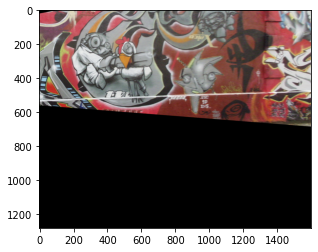

In [52]:
dst = cv.warpPerspective(img5,H1_5, ((img1.shape[1] + img5.shape[1]), img5.shape[0]+ img5.shape[0]))
plt.imshow(dst)
